# Sentimental Analysis for Amazon Beauty Products Reviews 

The main aim of this project is to analyze positivity and negativity of reviews given by the Customers based on the different brands of a particular foundation on popular Amazon website.

 Below listed are the products and their brands I have chosen for this project:
- NARS - Luminous-Weightless-Foundation
- CoverGirl - Fluid-Foundation-SPF15
- MAC - Simply-Ageless-Foundation



Below is the process for getting the product reviews from Amazon website and analyzing the data

### Step 1: Defining the product url's

In [2]:
AmazonProductList = ['https://www.amazon.com/All-Day-Luminous-Weightless-Foundation/dp/B00T45UQSI/ref=sr_1_3?keywords=Nars%2Bfoundation%2Bfor%2Bwomen&qid=1561860534&s=gateway&sr=8-3&th=1',
            'https://www.amazon.com/MAC-Studio-Fluid-Foundation-SPF15/dp/B007ANN0CA/ref=sr_1_10?crid=2HMBR7964RZZC&keywords=mac+foundation+women&qid=1561858886&s=gateway&sprefix=mac+foundation+for+women%2Caps%2C248&sr=8-10',
            'https://www.amazon.com/COVERGIRL-CGRMQ0347-Simply-Ageless-Foundation/dp/B0026P3GX0/ref=sr_1_48_sspa?keywords=olay%2Bfoundation%2Bfor%2Bwomen&qid=1561859200&s=gateway&sr=8-48-spons&th=1']

### Step 2: Defining a method for Web Scraping the Amazon to get reviews of above mentioned products

In [5]:
from lxml import html
from requests import get
from re import sub
from dateutil import parser as dateparser
from time import sleep

def ParseReviews(amazon_url):
   
    headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36'}
    for i in range(5):
        response = get(amazon_url, headers = headers, verify=False, timeout=30)
        if response.status_code == 404:
            return {"url": amazon_url, "error": "page not found"}
        if response.status_code != 200:
            continue
        
        cleaned_response = response.text.replace('\x00', '')
        
        parser = html.fromstring(cleaned_response)
        REVIEW_SECTION_1 = '//div[contains(@id,"reviews-summary")]'
        REVIEW_SECTION_2 = '//div[@data-hook="review"]'

        procduct_reviews = parser.xpath(REVIEW_SECTION_1)

        if not procduct_reviews:
            procduct_reviews = parser.xpath(REVIEW_SECTION_2)
       
        reviews_list = []
        
        for review in procduct_reviews:
            XPATH_RATING  = './/i[@data-hook="review-star-rating"]//text()'
            XPATH_REVIEW_HEADER = './/a[@data-hook="review-title"]//text()'
            XPATH_REVIEW_POSTED_DATE = './/span[@data-hook="review-date"]//text()'
            XPATH_REVIEW_TEXT_1 = './/div[@data-hook="review-collapsed"]//text()'
            XPATH_REVIEW_TEXT_2 = './/div//span[@data-action="columnbalancing-showfullreview"]/@data-columnbalancing-showfullreview'
            XPATH_REVIEW_COMMENTS = './/span[@data-hook="review-comment"]//text()'
            XPATH_AUTHOR = './/span[contains(@class,"profile-name")]//text()'
            XPATH_REVIEW_TEXT_3 = './/div[contains(@id,"dpReviews")]/div/text()'
            
            raw_review_author = review.xpath(XPATH_AUTHOR)
            raw_review_rating = review.xpath(XPATH_RATING)
            raw_review_header = review.xpath(XPATH_REVIEW_HEADER)
            raw_review_posted_date = review.xpath(XPATH_REVIEW_POSTED_DATE)
            raw_review_text1 = review.xpath(XPATH_REVIEW_TEXT_1)
            raw_review_text2 = review.xpath(XPATH_REVIEW_TEXT_2)
            raw_review_text3 = review.xpath(XPATH_REVIEW_TEXT_3)

            # Cleaning data
            author = ' '.join(' '.join(raw_review_author).split())
            review_rating = ''.join(raw_review_rating).replace('out of 5 stars', '')
            review_header = ' '.join(' '.join(raw_review_header).split())

            try:
                review_posted_date = dateparser.parse(''.join(raw_review_posted_date)).strftime('%d %b %Y')
            except:
                review_posted_date = None
            review_text = ' '.join(' '.join(raw_review_text1).split())

            # Grabbing hidden comments if present
            if raw_review_text2:
                json_loaded_review_data = loads(raw_review_text2[0])
                json_loaded_review_data_text = json_loaded_review_data['rest']
                cleaned_json_loaded_review_data_text = re.sub('<.*?>', '', json_loaded_review_data_text)
                full_review_text = review_text+cleaned_json_loaded_review_data_text
            else:
                full_review_text = review_text
            if not raw_review_text1:
                full_review_text = ' '.join(' '.join(raw_review_text3).split())

            raw_review_comments = review.xpath(XPATH_REVIEW_COMMENTS)
            review_comments = ''.join(raw_review_comments)
            review_comments = sub('[A-Za-z]', '', review_comments).strip()
            review_dict = {
                                'review_comment_count': review_comments,
                                'review_text': full_review_text,
                                'review_posted_date': review_posted_date,
                                'review_header': review_header,
                                'review_rating': review_rating,
                                'review_author': author

                            }
            reviews_list.append(review_dict)

        data = {
                   # 'ratings': ratings_dict,
                    'reviews': reviews_list,
                    'url': amazon_url,
                   # 'name': product_name,
                   # 'price': product_price
                
                }
        return data

    return {"error": "failed to process the page", "url": amazon_url}

### Step 3: Passing the url's to the above method and store the returned data

In [7]:
reviews_extracted = []
for product in AmazonProductList:
    reviews_extracted.append(ParseReviews(product))
    sleep(5)


C:\Users\S534741\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\S534741\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\S534741\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


### Step 4: Defining a method for calculating sentimental analysis of extracted reviews

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def get_sentiments(text):
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(text)

### Step 5: Passing reviews to defined analyzer method and finding sentimental analysis of reviews

In [12]:
Positive=[]
Negative=[]
reviewPos=[]
for reviewData in reviews_extracted:
    sentiments1 = [get_sentiments(comment["review_text"]) for comment in reviewData["reviews"]]
    Review1pos = [sent['pos'] for sent in sentiments1]
    reviewPos.append(Review1pos)
    Review1neg = [sent['neg'] for sent in sentiments1]
    Positive.append(sum(Review1pos)/len(Review1pos))
    Negative.append(sum(Review1neg)/len(Review1neg))

### Step 6: Visualizaing the results of sentimental analysis using bar graph

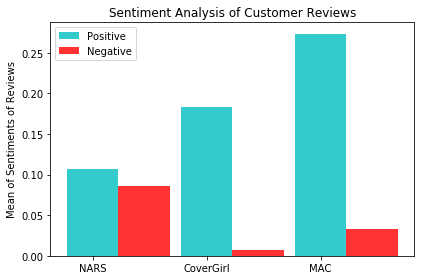

In [14]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
axes = fig.add_subplot(111)
n=3
index=np.arange(n)
barwidth=0.45
opacity=0.8

objects=('NARS','CoverGirl','MAC')

product1 = plt.bar(index, Positive, barwidth,
alpha=opacity,
color='c',
label='Positive')

product2 = plt.bar(index + barwidth, Negative,barwidth,
alpha=opacity,
color='r',
label='Negative')


plt.xticks(index, objects)
plt.ylabel('Mean of Sentiments of Reviews')
plt.title('Sentiment Analysis of Customer Reviews')

plt.legend()
plt.tight_layout()

plt.show()

## Conclusion:

On Comparing the three different beauty product brands such as NARS, CoverGirl and MAC, the conclusions drawn were:
MAC has got most positive number of reviews compared to NARS and CoverGirl.
CoverGirl has got the second most positive reviews and is also the first most product which has got the least negative reviews Compared to NARS and MAC.
Finally, NARS is the product which has less positive reviews than CoverGirl and MAC and highest negative reviews compared to both the other products.
On the whole, customers will easily identify which product has got more number of positive reviews and hence could choose the product.
